In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\91827\OneDrive\Pictures\MCA_Notes\Python Scripts\Amazon Sale Report.csv")

In [3]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
df.shape

(128976, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [6]:
df.drop(columns='index', inplace= True)

In [7]:
df.isnull().sum()

Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [8]:
df.drop(['New', 'PendingS'], axis = 1, inplace= True)

In [9]:
#df.dropna(inplace = True)

In [10]:
df.drop('fulfilled-by', axis= 1, inplace=True)

In [11]:
df[['Amount','currency','ship-country','ship-postal-code','ship-state','ship-city']].head()

,Amount,currency,ship-country,ship-postal-code,ship-state,ship-city
0,647.62,INR,IN,400081.0,MAHARASHTRA,MUMBAI
1,406.00,INR,IN,560085.0,KARNATAKA,BENGALURU
2,329.00,INR,IN,410210.0,MAHARASHTRA,NAVI MUMBAI
3,753.33,INR,IN,605008.0,PUDUCHERRY,PUDUCHERRY
4,574.00,INR,IN,600073.0,TAMIL NADU,CHENNAI


In [12]:
df.dtypes

Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                      bool
dtype: object

In [13]:
df['Date'] = df['Date'].str.replace(r'(\d{2}-\d{2})-(\d{2})$', r'\1-20\2', regex=True)
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%Y')
df['YearMonth'] = df['Date'].dt.to_period('M')


In [14]:
monthly_sales = df.groupby('YearMonth')['Amount'].sum()
print(monthly_sales)

YearMonth
2022-03      101683.85
2022-04    28836200.27
2022-05    26226476.75
2022-06    23425809.38
Freq: M, Name: Amount, dtype: float64


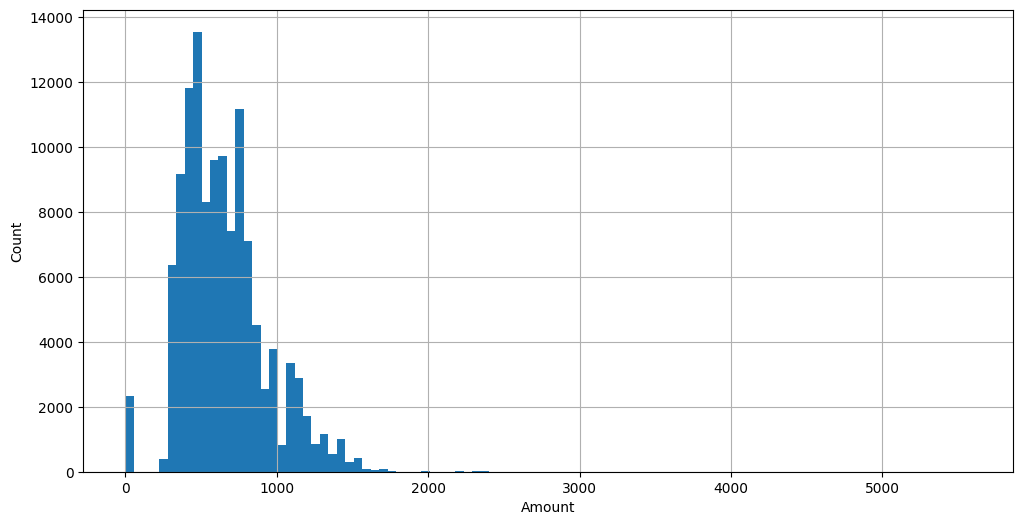

In [15]:
plt.figure(figsize=(12, 6))
plt.hist(x=df['Amount'], bins=100)
plt.grid()
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()


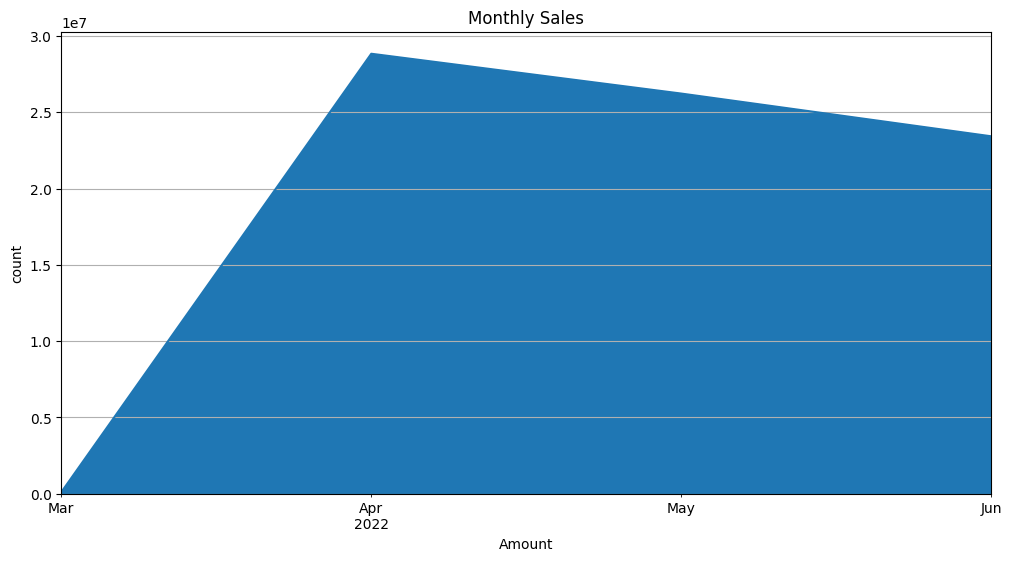

In [16]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='area')  # Change 'line' to 'bar' for bar graph
plt.title('Monthly Sales')
plt.xlabel('Amount')
plt.ylabel('count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [17]:
df['Amount']=df['Amount'].fillna(df['Amount'].median()) # hightly skewed thatswhy median used
df['currency']=df['currency'].fillna(df['currency'].mode()[0]) # categorical feature thatswhy mode
df['ship-country']=df['ship-country'].fillna(df['ship-country'].mode()[0]) # categorical feature thatswhy mode
df['ship-postal-code']=df['ship-postal-code'].fillna(df['ship-postal-code'].median()) #right skewed thatswhy median
df['ship-state']=df['ship-state'].fillna(df['ship-state'].mode()[0]) # categorical feature thatswhy mode
df['ship-city']=df['ship-city'].fillna(df['ship-city'].mode()[0]) # categorical feature thatswhy mode


In [18]:
df.drop_duplicates(inplace= True)

In [19]:
df['Date']=pd.to_datetime(df['Date'])
df['ship-postal-code']=df['ship-postal-code'].astype(np.int64)

In [20]:
df.describe()

,Date,Qty,Amount,ship-postal-code
count,128017,128017.000000,128017.000000,128017.000000
mean,2022-05-12 12:28:25.161033728,0.905763,646.440855,463805.631697
min,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,2022-04-20 00:00:00,1.000000,459.000000,382418.000000
50%,2022-05-10 00:00:00,1.000000,605.000000,500032.000000
75%,2022-06-04 00:00:00,1.000000,771.000000,600024.000000
max,2022-06-29 00:00:00,15.000000,5584.000000,989898.000000
std,NaN,0.311719,273.173905,191534.591520


In [21]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'YearMonth'],
      dtype='object')

In [22]:
monthly_sales.sum()

78590170.25

In [23]:
monthly_sales.mean()


19647542.5625

In [24]:
df['Category'].value_counts()

Category
T-shirt     50042
Shirt       49352
Blazzer     15391
Trousers    10577
Perfume      1154
Wallet        913
Socks         429
Shoes         157
Watch           2
Name: count, dtype: int64

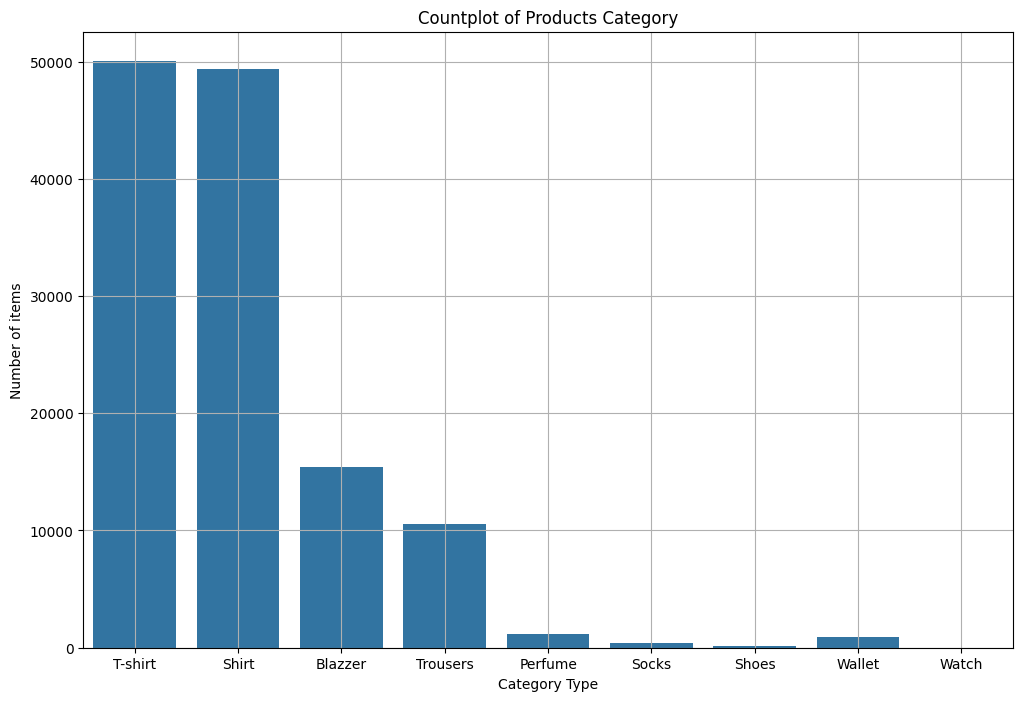

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(x='Category',data=df)
plt.xlabel('Category Type')
plt.ylabel('Number of items')
plt.grid()
plt.title('Countplot of Products Category')
plt.show()

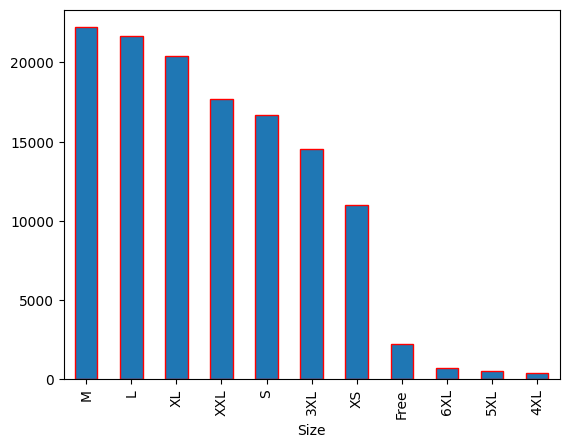

In [26]:
df['Size'].value_counts().plot(kind='bar',edgecolor='r')
plt.show()

In [27]:
df['Fulfilment'].value_counts()

Fulfilment
Amazon      89085
Merchant    38932
Name: count, dtype: int64

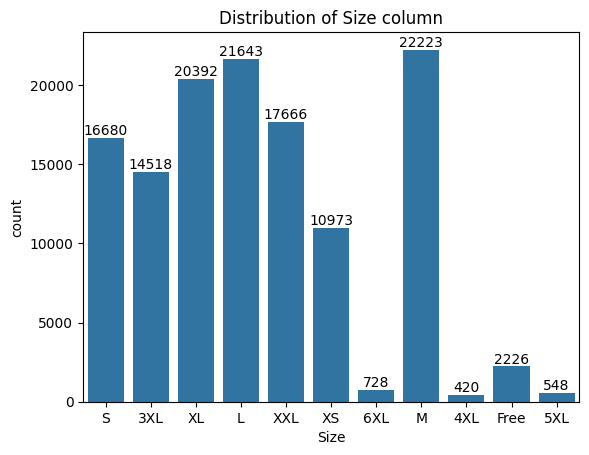

In [28]:
ax=sns.countplot(x='Size' , data= df)
for bar_value in ax.containers:
    ax.bar_label(bar_value)
plt.title('Distribution of Size column')
plt.show()

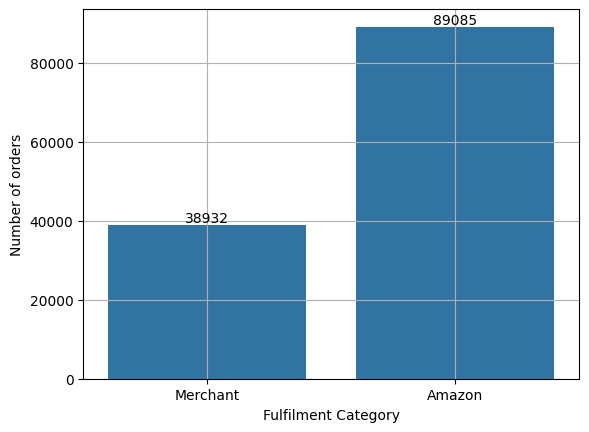

In [29]:
ax=sns.countplot(x='Fulfilment',data=df)
for bar in ax.containers:
    ax.bar_label(bar)
plt.grid()
plt.xlabel('Fulfilment Category')
plt.ylabel('Number of orders')
plt.show()

In [30]:
df['Status'].value_counts()

Status
Shipped                          77407
Shipped - Delivered to Buyer     28515
Cancelled                        18044
Shipped - Returned to Seller      1945
Shipped - Picked Up                970
Pending                            656
Pending - Waiting for Pick Up      277
Shipped - Returning to Seller      144
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            4
Shipped - Damaged                    1
Name: count, dtype: int64

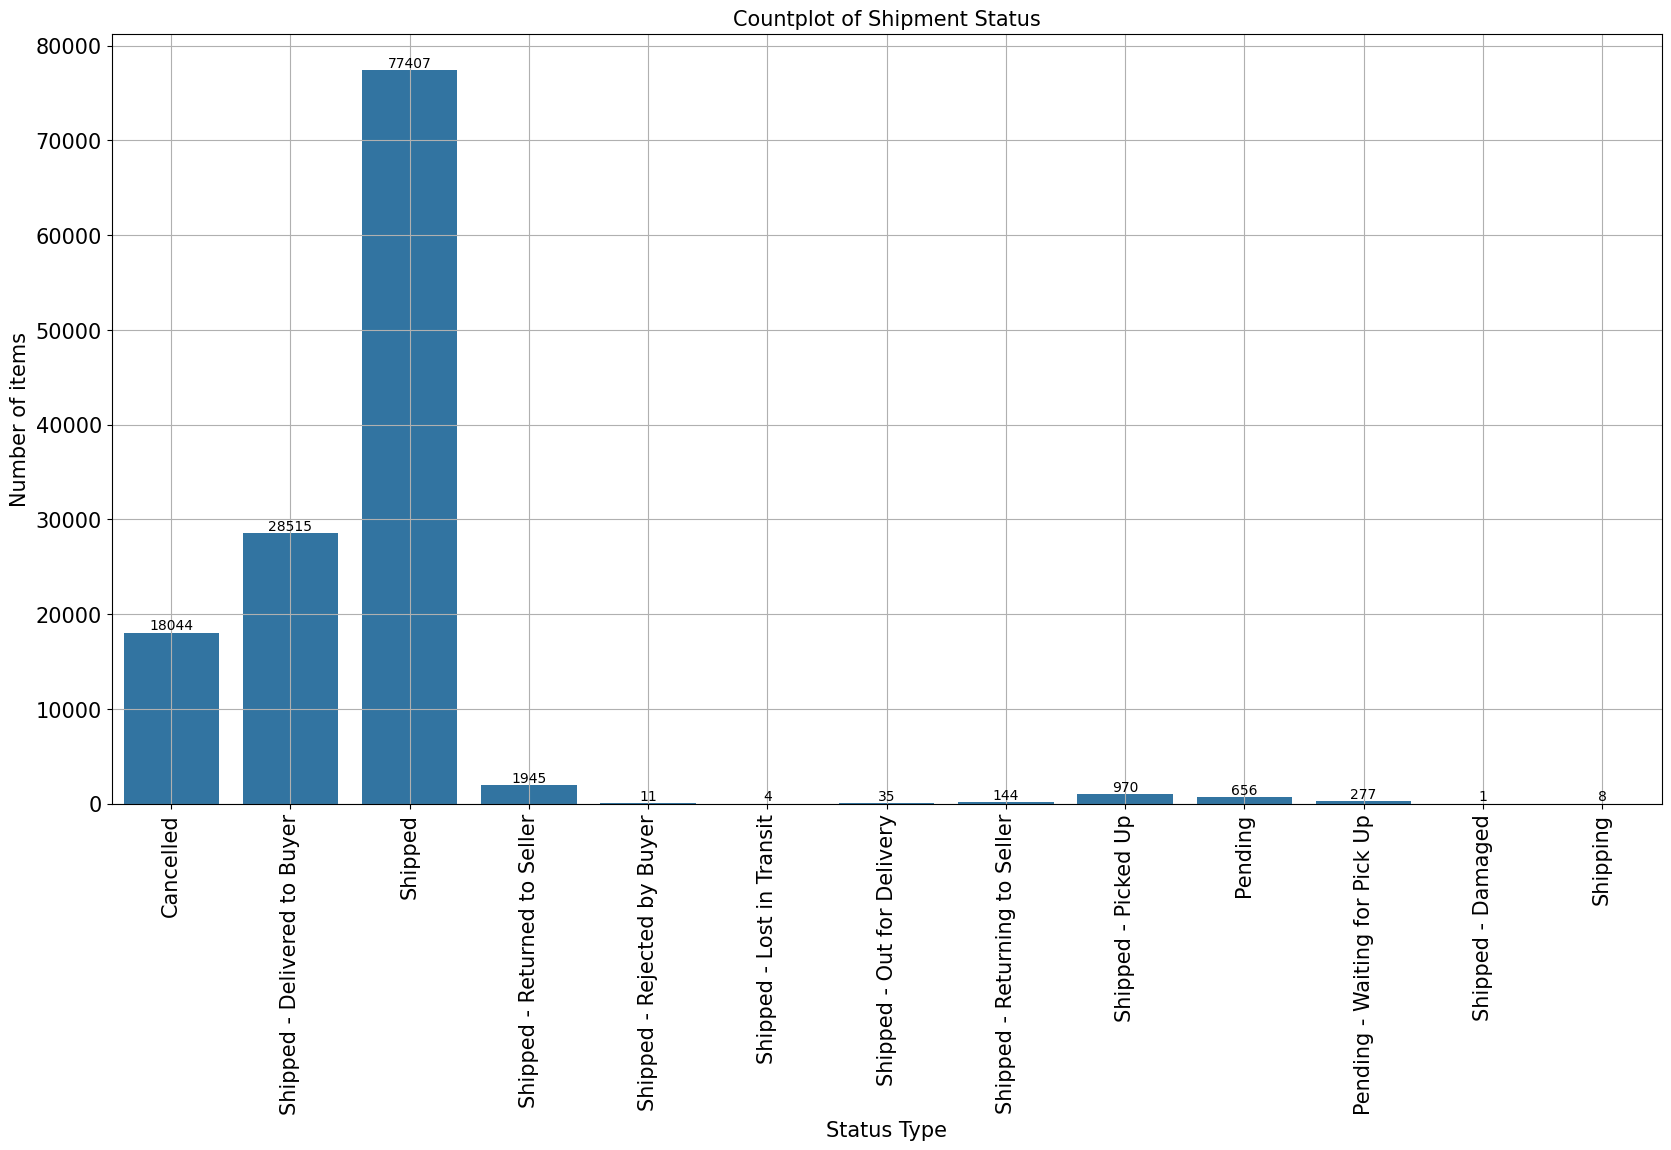

In [31]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='Status',data=df)
for val in ax.containers:
    ax.bar_label(val)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)
plt.xlabel('Status Type',size=15)
plt.ylabel('Number of items',size=15)
plt.grid()
plt.title('Countplot of Shipment Status',size=15)
plt.show()

In [32]:
df['Sales Channel'].value_counts()


Sales Channel
Amazon.in     127893
Non-Amazon       124
Name: count, dtype: int64

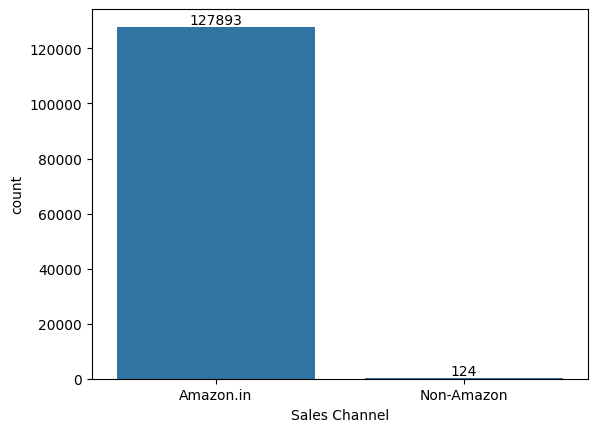

In [33]:
ax=sns.countplot(x='Sales Channel',data=df)
for bar_value in ax.containers:
    ax.bar_label(bar_value)
plt.show()

In [34]:
df['ship-service-level'].value_counts()

ship-service-level
Expedited    88003
Standard     40014
Name: count, dtype: int64

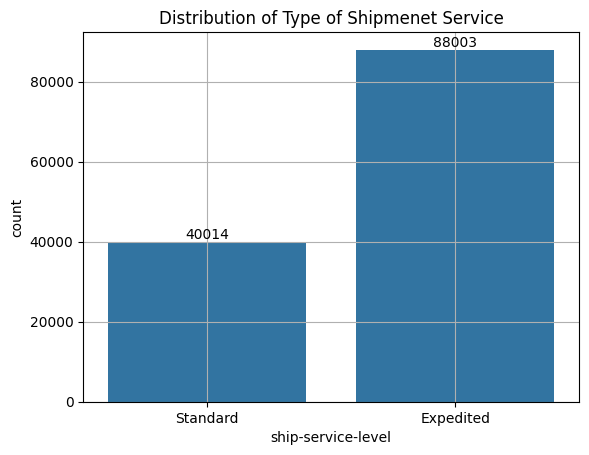

In [35]:
ax=sns.countplot(x='ship-service-level',data=df)
for bar_value in ax.containers:
    ax.bar_label(bar_value)
plt.title('Distribution of Type of Shipmenet Service')
plt.grid()
plt.show()

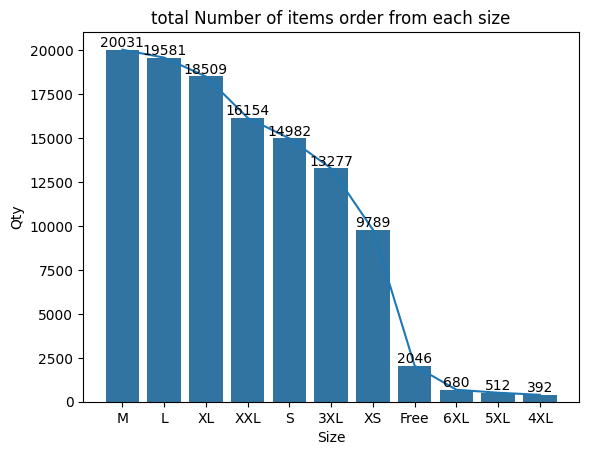

In [36]:
size_df=pd.DataFrame(df.groupby('Size')['Qty'].sum().sort_values(ascending=False))

ax=sns.barplot(x=size_df.index,y='Qty',data=size_df)
for bar_value in ax.containers:
    ax.bar_label(bar_value)
plt.plot(size_df['Qty'])
plt.title('total Number of items order from each size')
plt.show()

In [37]:
df['Courier Status'].value_counts()

Courier Status
Shipped       108830
On the Way      6799
Unshipped       6644
Cancelled       5744
Name: count, dtype: int64

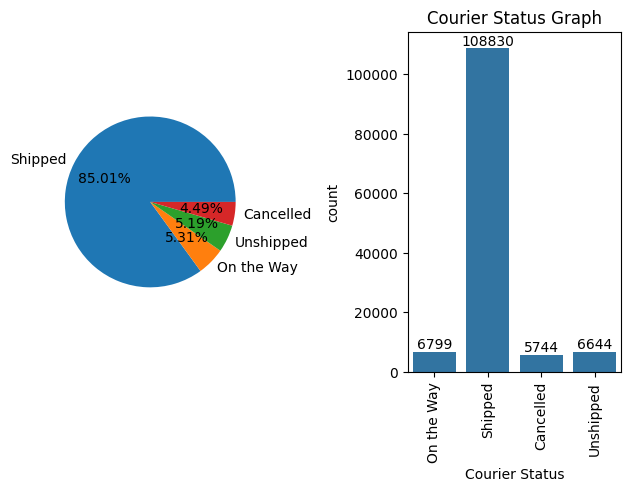

In [38]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2)

ax1.pie(x=df['Courier Status'].value_counts().values,labels=df['Courier Status'].value_counts().index,autopct='%0.2f%%')
ax=sns.countplot(x='Courier Status',data=df,ax=ax2)
for bar_value in ax.containers:
    ax.bar_label(bar_value)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Courier Status Graph')
plt.show()

In [39]:
df['Qty'].value_counts()

Qty
1     115088
0      12543
2        339
3         32
4          9
5          2
15         1
9          1
13         1
8          1
Name: count, dtype: int64

In [40]:
df['ship-country'].unique()

array(['IN'], dtype=object)

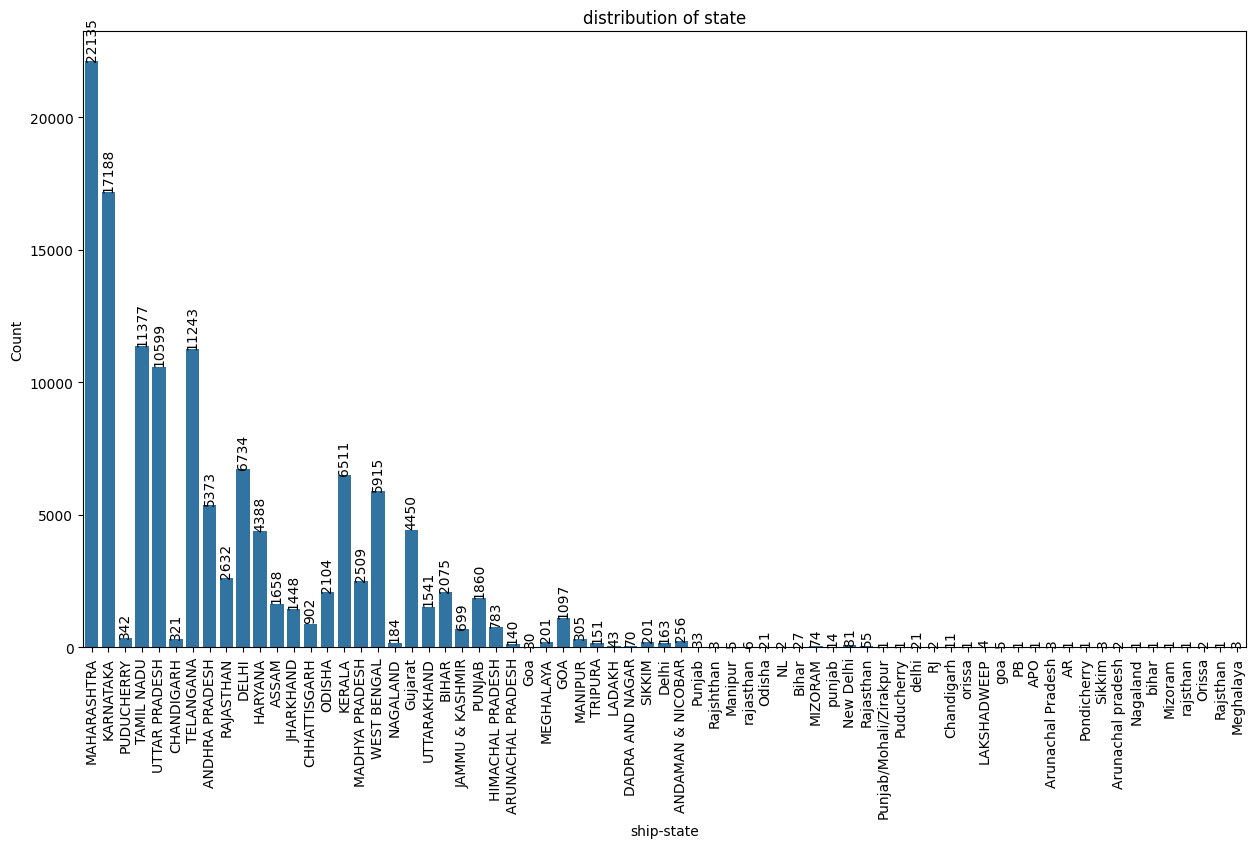

In [41]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data=df, x='ship-state')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', rotation=90)
plt.xlabel('ship-state')
plt.ylabel('Count')
plt.title('distribution of state')
plt.xticks(rotation=90)
plt.show()

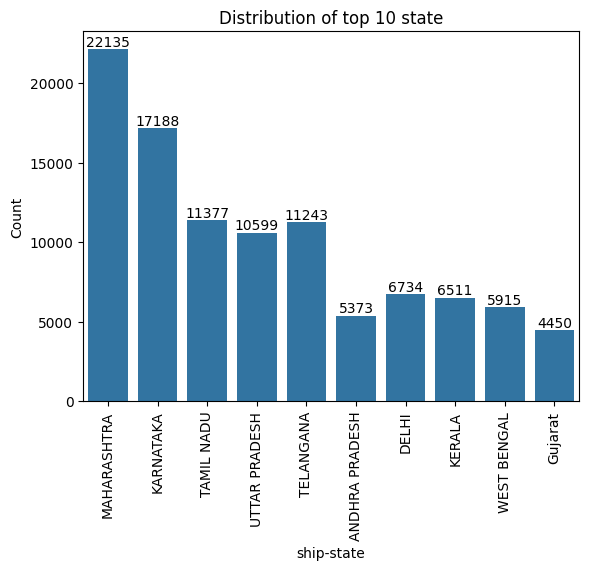

In [42]:
#Top 10 State Graph
top_10_state_index=df['ship-state'].value_counts().sort_values(ascending=False).head(10).index
ax=sns.countplot(data=df[df['ship-state'].isin(top_10_state_index)], x = 'ship-state')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('ship-state')
plt.ylabel('Count')
plt.title('Distribution of top 10 state')
plt.xticks(rotation=90)
plt.show()

In [43]:
df['ship-city'].value_counts().sort_values(ascending=False).head(10)

ship-city
BENGALURU    11153
HYDERABAD     8018
MUMBAI        6069
NEW DELHI     5752
CHENNAI       5376
PUNE          3841
KOLKATA       2361
GURUGRAM      1855
THANE         1692
LUCKNOW       1453
Name: count, dtype: int64

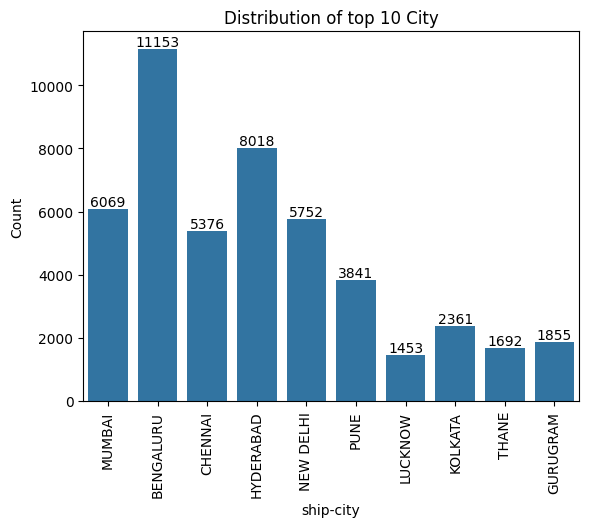

In [44]:
#plot top 10 city from the dataset
top_10_city=df['ship-city'].value_counts().sort_values(ascending=False).head(10).index
ax=sns.countplot(x='ship-city',data=df[df['ship-city'].isin(top_10_city)])
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('ship-city')
plt.ylabel('Count')
plt.title('Distribution of top 10 City')
plt.xticks(rotation  = 90)
plt.show()

In [45]:
#top 10 postal code from where orders are coming mostly
df['ship-postal-code'].value_counts().sort_values(ascending=False).head(10)

ship-postal-code
201301    1000
122001     680
560037     628
560068     606
560076     574
560043     497
500072     487
401107     487
560100     486
560066     461
Name: count, dtype: int64

In [46]:
df['B2B'].value_counts()

B2B
False    127150
True        867
Name: count, dtype: int64

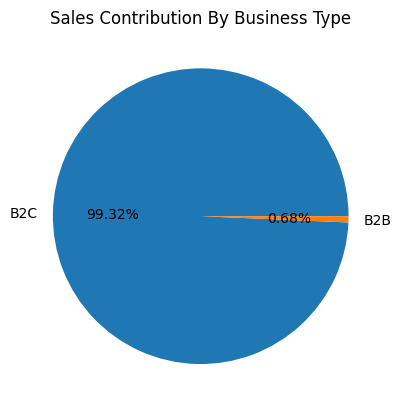

In [47]:
plt.pie(x=df['B2B'].value_counts().values,labels=['B2C','B2B'],autopct='%0.2f%%')
plt.title('Sales Contribution By Business Type')
plt.show()

In [48]:
numerical_df = df.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()

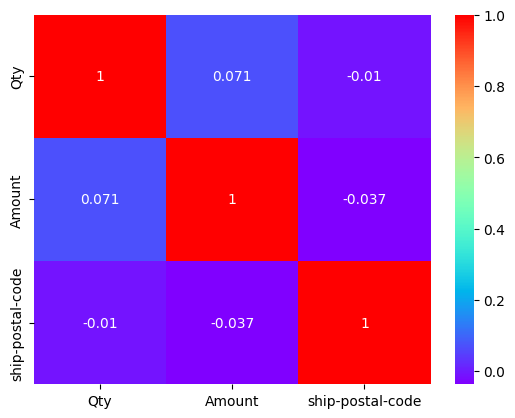

In [49]:
sns.heatmap(corr_matrix, annot=True, cmap='rainbow') 
plt.show()